In [1]:
from __future__ import division, print_function
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
sp.init_printing()
%matplotlib nbagg

In [3]:
def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

from shapely.geometry import Polygon, Point

def get_points_in_polygon(poly, n=1000):
    (minx, miny, maxx, maxy) = poly.bounds
    x = np.linspace(minx, maxx, n, endpoint=True)
    y = np.linspace(miny, maxy, n, endpoint=True)
    x, y = np.meshgrid(x,y)
    points = []
    for i, j in zip(x.flatten(), y.flatten()):
        p = Point(i,j)
        if poly.intersects(p):
            points.append([i,j])
    return points

def rotate(points, angle):
    alpha = angle *np.pi/180
    return np.dot(np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha), np.cos(alpha)]]), points.T).T

# Střed smyku

In [4]:
t, b0, a, y, z, Vz = sp.symbols('t b_0 a y z V_z')

In [5]:
b0_val = 100 # mm
t_val = 4 # mm
Vz_val = 20000 # N

In [6]:
prurez = np.array([[t_val/2, b0_val/2 - t_val/2],
                  [t_val/2 + b0_val, b0_val/2 - t_val/2],
                  [t_val/2 + b0_val, b0_val],
                  [-t_val/2 + b0_val, b0_val],
                  [-t_val/2 + b0_val, b0_val/2 + t_val/2],
                  [-t_val/2, b0_val/2 + t_val/2],
                  [-t_val/2, -(b0_val/2 + t_val/2)],
                  [-t_val/2 + b0_val, -(b0_val/2 + t_val/2)],
                  [-t_val/2 + b0_val, -b0_val],
                  [t_val/2 + b0_val, -b0_val],
                  [t_val/2 + b0_val, -(b0_val/2 - t_val/2)],
                  [t_val/2, -(b0_val/2 - t_val/2)],
                  [t_val/2, b0_val/2 - t_val/2]])
p = Polygon(prurez[:, :2])

points = get_points_in_polygon(p)
points = np.array(points)

<IPython.core.display.Javascript object>


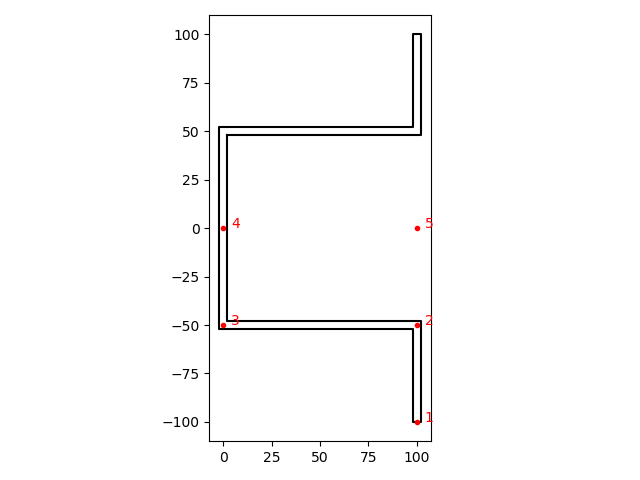

In [7]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(prurez[:, 0], prurez[:, 1], 'k-')

ax.plot(b0_val, -b0_val, 'ro', ms=3)
ax.annotate('1', (b0_val+t_val, -b0_val), color='r')

ax.plot(b0_val, -b0_val/2, 'ro', ms=3)
ax.annotate('2', (b0_val +t_val, -b0_val/2), color='r')

ax.plot(0, -b0_val/2, 'ro', ms=3)
ax.annotate('3', (t_val, -b0_val/2), color='r')

ax.plot(0, 0, 'ro', ms=3)
ax.annotate('4', (t_val, 0), color='r')

ax.plot(b0_val, 0, 'ro', ms=3)
ax.annotate('5', (b0_val + t_val, 0), color='r')

ax.set_aspect('equal')

### Moment setrvačnosti
- zanedbáme $ \frac{1}{12} b_0 t^3 $ vodorovných částí

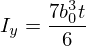

In [8]:
Iy = (sp.Rational(1, 12) * t * b0**3 + 
      sp.Rational(1, 12) * t * (2 * b0)**3 - sp.Rational(1, 12) * t * b0**3 + 
      2 * t * b0 * (b0/2)**2) # + 2 * sp.Rational(1, 12) * b0 * t**3
display(sp.Eq(sp.S('I_y'), Iy))

### Napětí v bodě 1

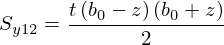

In [9]:
# bod 1
Sy_12 = t * (b0 - z) * ((b0 - z)/2 + z)
Sy_12 = sp.simplify(Sy_12)
display(sp.Eq(sp.S('S_y_12'), Sy_12))
Sy_1 = Sy_12.subs(dict(z=b0))
display(sp.Eq(sp.S('S_y_1'), Sy_1))

tau_1 = Vz * Sy_1 / (Iy * t)
tau_1 = sp.simplify(tau_1)
display(sp.Eq(sp.S('tau_1'), tau_1))

### Napětí mezi body 1-2

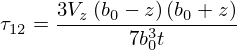

In [10]:
tau_12 = Vz * Sy_12 / (Iy * t)
display(sp.Eq(sp.S('tau_12'), tau_12))

### Napětí v bodě 2

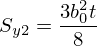

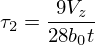

In [11]:
# bod 2
Sy_2 = Sy_12.subs(dict(z=b0/2))
Sy_2 = sp.simplify(Sy_2)
display(sp.Eq(sp.S('S_y_2'), Sy_2))

tau_2 = Vz * Sy_2 / (Iy * t)
tau_2 = tau_2
tau_2 = sp.simplify(tau_2)
display(sp.Eq(sp.S('tau_2'), tau_2))

### Napětí v bodě 3

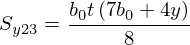

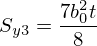

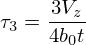

In [12]:
# bod 3
Sy_23 = Sy_2 - (-b0 - y) * t * b0 / 2 #+t * b0 * b0/2
Sy_23 = sp.simplify(Sy_23)
display(sp.Eq(sp.S('S_y_23'), Sy_23))
Sy_3 = Sy_23.subs(dict(z=b0/2, y=0))
display(sp.Eq(sp.S('S_y_3'), Sy_3))

tau_3 = Vz * Sy_3 / (Iy * t)
tau_3 = sp.simplify(tau_3)
display(sp.Eq(sp.S('tau_3'), tau_3))

### Napětí mezi body 2-3

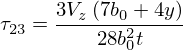

In [13]:
tau_23 = Vz * Sy_23 / (Iy * t)
display(sp.Eq(sp.S('tau_23'), tau_23))

### Napětí v bodě 4

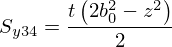

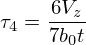

In [14]:
# bod 4
Sy_34 = Sy_23.subs(dict(z=b0/2, y=0)) + (b0 / 2 - z) * t * ((b0 / 2 - z) /2 + z) # + t * b0/2 * b0/4
Sy_34 = sp.simplify(Sy_34)
display(sp.Eq(sp.S('S_y_34'), Sy_34))
Sy_4 = Sy_34.subs(dict(z=0))
display(sp.Eq(sp.S('S_y_4'), Sy_4))

tau_4 = Vz * Sy_4 / (Iy * t)
tau_4 = sp.simplify(tau_4)
display(sp.Eq(sp.S('tau_4'), tau_4))

### Napětí mezi body 3-4

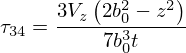

In [15]:
tau_34 = Vz * Sy_34 / (Iy * t)
display(sp.Eq(sp.S('tau_34'), tau_34))

### Smyková síla $Q_1$ na úseku 1-2

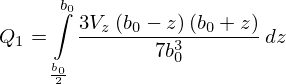

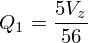

In [16]:
Q1 = sp.Integral(tau_12 * t, (z, b0/2, b0))
display(sp.Eq(sp.S('Q1'), Q1))

Q1 = Q1.doit()
display(sp.Eq(sp.S('Q1'), Q1))

### Smyková síla $Q_1$ na úseku 1-2 
- pomocí vzorečku pro plochu paraboly $\frac{2}{3}ab$

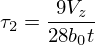

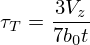

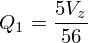

In [17]:
tau_5 = Vz * Sy_12.subs(dict(z=0)) / (Iy * t)
display(sp.Eq(sp.S('tau_2'), tau_2))
display(sp.Eq(sp.S('tau_T'), tau_5))
Q1_ = (sp.Rational(2, 3) * tau_5 * b0 - tau_2 * b0/2 - sp.Rational(2, 3) * (tau_5 - tau_2) * b0/2) *t
display(sp.Eq(sp.S('Q_1'), Q1_))

### Smyková síla $Q_2$ na úseku 2-3

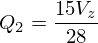

In [18]:
Q2 = (tau_2 + tau_3) / 2 * b0 * t
display(sp.Eq(sp.S('Q_2'), Q2))

### Smyková síla $Q_3$ na úseku 3-4

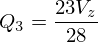

In [19]:
Q3 = t * (tau_3 * b0 + 
          sp.Rational(2,3) * b0 * (tau_4 - tau_3))
display(sp.Eq(sp.S('Q_3'), Q3))

### Ekvivalence ve svislém směru
$ V_z = 2 Q_1 + Q_3$

In [20]:
display(sp.Eq(sp.S('V_z'), 2 * Q1 + Q3))

### Vzdálenost středu smyku od bodu 4
- momentová podmínka k bodu 4

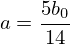

In [21]:
a_dist = sp.solve(2 * Q1 * b0 - Q2 * b0 + Vz * a, a)[0]
display(sp.Eq(sp.S('a'), a_dist))
display(sp.Eq(sp.S('a'), a_dist.evalf()))

In [22]:
f_12 = sp.lambdify(z, tau_12.subs(dict(t=t_val, b_0=b0_val, V_z=Vz_val)), 'numpy')
z_12 = np.linspace(50, 100, 1000)
y_12 = f_12(z_12)

In [23]:
f_23 = sp.lambdify(y, tau_23.subs(dict(t=t_val, b_0=b0_val, V_z=Vz_val)), 'numpy')
y_23 = -np.linspace(0, 100, 1000)
z_23 = f_23(y_23)

In [24]:
f_34 = sp.lambdify(z, tau_34.subs(dict(t=t_val, b_0=b0_val, V_z=Vz_val)), 'numpy')
z_34 = np.linspace(-50, 50, 1000)
y_34 = f_34(z_34)

<IPython.core.display.Javascript object>


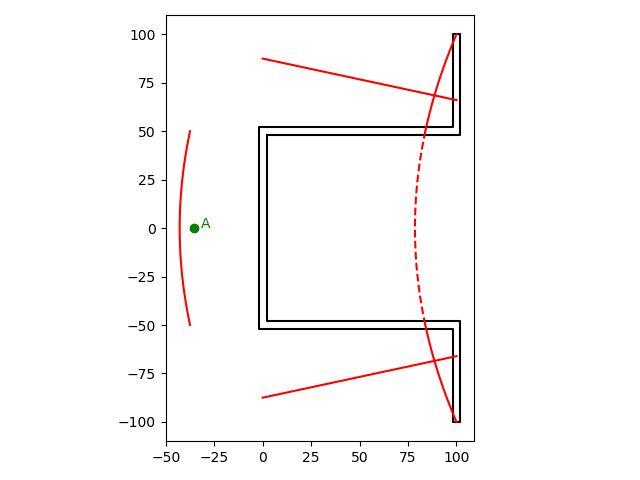

In [25]:
fig, ax = plt.subplots(tight_layout=True)
ax.plot(prurez[:, 0], prurez[:, 1], 'k-')
ax.plot(-y_12 + b0_val, z_12, 'r')
ax.plot(-y_23, z_23+b0_val/2, 'r')
ax.plot(-y_34, z_34, 'r')
ax.plot(-y_23, -(z_23+b0_val/2), 'r')
ax.plot(-y_12 + b0_val, -z_12, 'r')

f_12 = sp.lambdify(z, tau_12.subs(dict(t=t_val, b_0=b0_val, V_z=Vz_val)), 'numpy')
z_12 = np.linspace(-50, 50, 1000)
y_12 = f_12(z_12)
ax.plot(-y_12 + b0_val, z_12, 'r--')

f_a = f_34 = sp.lambdify(b0, a_dist, 'numpy')
y = -f_a(b0_val)
ax.plot(y, 0, 'go')
ax.annotate('A', (y + t_val, 0), color='g')

ax.set_aspect('equal')